# 边缘与轮廓

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt 
import numpy as np
def imshow(img):
    img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    plt.imshow(img)

## 查找物体的轮廓

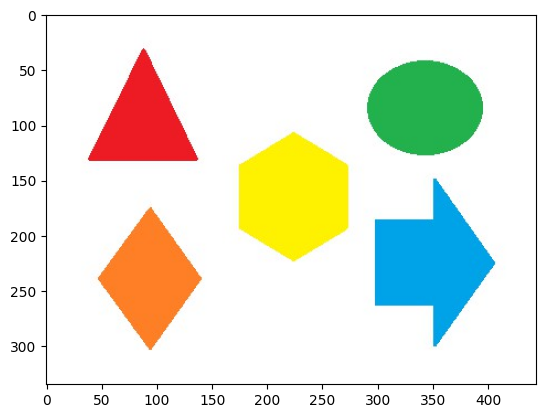

In [2]:
img = cv.imread("img/shape.jpg")
imshow(img)

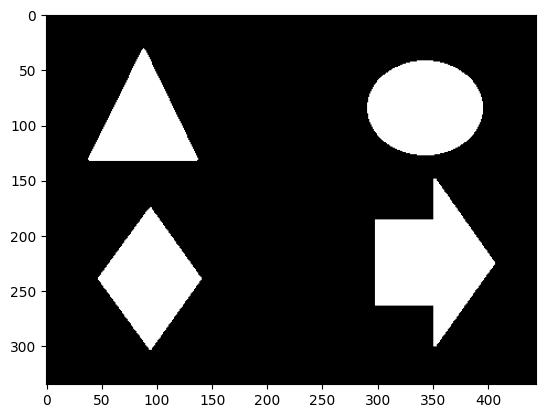

In [3]:
# 彩图转灰度图
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
# 灰度图转二值图
thresh,binary = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV | cv.THRESH_OTSU)
plt.imshow(binary,cmap="gray")

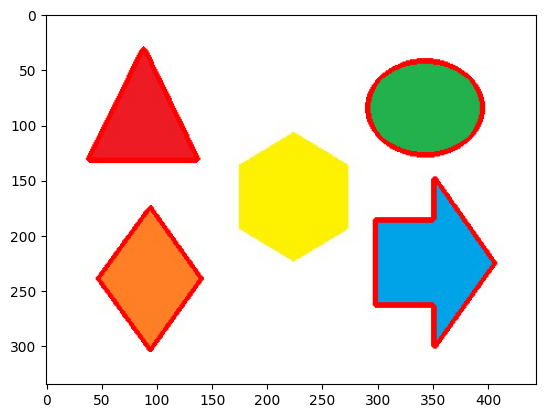

In [4]:
# 查找轮廓
contours,hierarchy = cv.findContours(binary,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
# 绘制轮廓
dst = img.copy()
rst = cv.drawContours(dst,contours,-1,(0,0,255),3)
imshow(rst)

## 根据轮廓获取信息

In [5]:
dst = img.copy()
for c in contours:
    # 计算面积
    area = cv.contourArea(c)
    # 计算周长
    arc = cv.arcLength(c,True)
    # 计算最小的外切圆
    (x,y),r = cv.minEnclosingCircle(c)
    cv.circle(dst,(int(x),int(y)),int(r),(0,255,0),3)
    # 最小的包围盒子
    ret = cv.boundingRect(c)
    print(f"area={area},arc={arc},ret={ret}")

area=6077.5,arc=334.80107259750366,ret=(47, 175, 94, 129)
area=8384.0,arc=454.7350597381592,ret=(298, 149, 109, 152)
area=6944.0,arc=314.73506212234497,ret=(291, 42, 105, 86)
area=5128.5,arc=340.83556735515594,ret=(38, 31, 100, 102)


# 练习
框选出最大的云朵

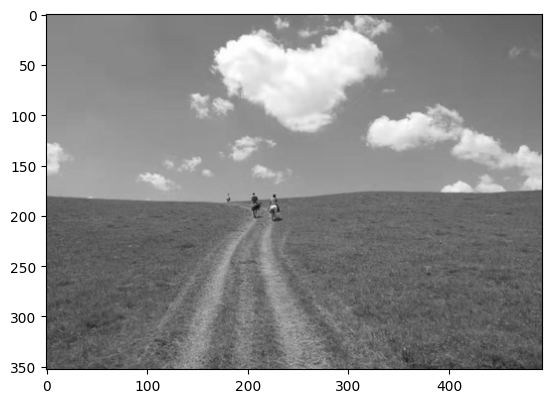

In [9]:
img = cv.imread("img/yunduo.jpg")
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
imshow(gray)

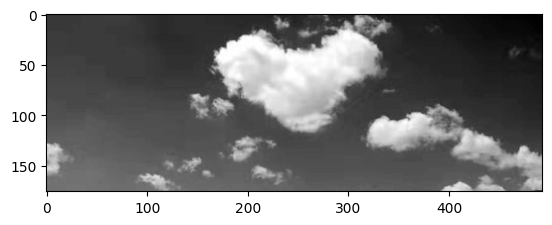

In [11]:
# 去除图像不必要的元素
height,width = img.shape[0:2]
helf_img = gray[0:int(height/2),0:width]
plt.imshow(helf_img,cmap="gray")

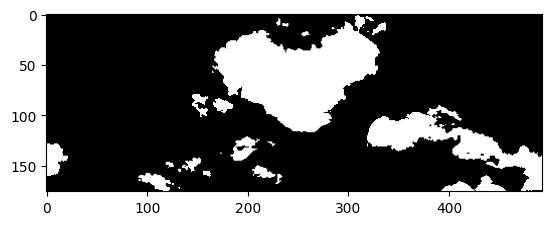

In [14]:
thresh,binary = cv.threshold(helf_img,0,255,cv.THRESH_BINARY | cv.THRESH_OTSU)
plt.imshow(binary,cmap="gray")

In [15]:
# 查找轮廓
contours,_ = cv.findContours(binary,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
maxArea = 0 # 最大轮廓
maxIndex = -1 # 最大索引

# 找出最大的轮廓
for i,c in enumerate(contours):
    area = cv.contourArea(c)
    if area > maxArea:
        maxArea = area
        maxIndex = i
print(f"最大索引：{maxIndex},最大面积：{maxArea}")

最大索引：32,最大面积：10083.0


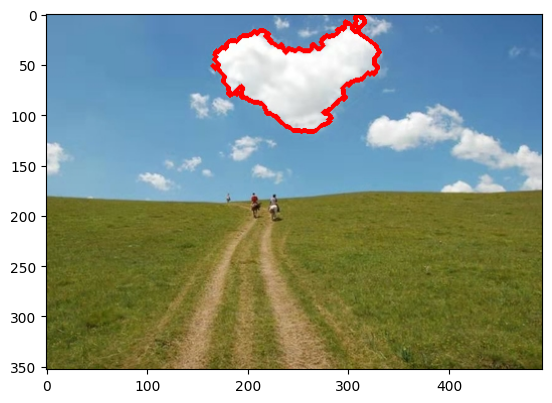

In [16]:
# 将最大的云朵在原图中框选出来
dst = img.copy()
cv.drawContours(dst,contours,maxIndex,(0,0,255),3)
imshow(dst)